In [1]:
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
from sklearn import linear_model
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import ensemble
import time
import random



/Users/s0c01xa/Desktop/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import cv2
import tqdm


# Getting the function to obtain matrix from images


In [3]:
def get_list_image(imagepath): 
    import os
    folder_path=imagepath
    image_list=[]
    for filename in os.listdir(folder_path):
        if(filename.endswith('.jpg') | filename.endswith('.jpeg') | filename.endswith('.png')):
        #it will open the filename
            #f=open(folder_path + '/' + filename)
            #print f
            image=cv2.imread(folder_path + '/' + filename)
            
            #image=cv2.imread(os.path.join(folder_path,filename))
            image_list.append(image)
    return image_list

In [4]:
#np.shape(train_jar[6])
jar='/Users/s0c01xa/Documents/Jar Images'
non_jar='/Users/s0c01xa/Documents/Non Jar images'


In [5]:
train_jar=get_list_image(jar)
train_nonjar=get_list_image(non_jar)


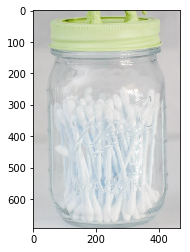

In [7]:
plt.imshow(train_jar[10])
plt.show()
#len(train_nonjar)
#np.shape(train_jar[0])
#np.shape(train_jar)

# y_jar is encoded as 1 ,   #y_nonjar is encoded as 0

In [8]:
y_jar= np.array([1]*len(train_jar))
y_nonjar=np.array([0]*len(train_nonjar))


In [551]:
#type(y_jar)
#np.shape(train_jar[0])

# Converting the images and resizing it using CV2

In [9]:
def get_same_size_image(img_list):
    res_image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(200,200))
        res_image_list.append(resized_image)
    return res_image_list

In [10]:
#plt.imshow(Res_train_jar[1])
#plt.show()
resized_train_jar=get_same_size_image(train_jar)
resized_train_nonjar=get_same_size_image(train_nonjar)

In [11]:
np.shape(resized_train_jar[0])

(200, 200, 3)

In [12]:
def get_image_plotted(image,i):
    plt.imshow(image[i])
    plt.show()


# Converting to grey scale

In [13]:
def get_gray_image(image_list):
    gray_image=[]
    for i in range(0,len(image_list)):
        gray=cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY)
        gray_image.append(gray)
    return gray_image



In [14]:
gray_jar=get_gray_image(resized_train_jar)
gray_non_jar=get_gray_image(resized_train_nonjar)

In [118]:
#np.shape(gray_jar[0])
#plt.imshow(gray_jar[5])
#plt.show()

# Extracting HOG FeaturesPython


In [15]:
#get_image_plotted(resized_train_nonjar,10)

from skimage import feature
H = feature.hog(gray_jar[0], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
np.shape(H)



(20736,)

# PREPARING THE HOG FEATURE VECTORS

In [16]:
def get_hog_feature_array(image_list):
    hog_feat_arr=np.zeros((len(image_list),20736))
    from skimage import feature
    for i in range(0,len(image_list)):
        H = feature.hog(image_list[i], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        hog_feat_arr[i]=H
        
    return hog_feat_arr
    

In [17]:
jar_hog_feat=get_hog_feature_array(gray_jar)
nonjar_hog_feat=get_hog_feature_array(gray_non_jar)


In [19]:
len(jar_hog_feat[10])


20736

# Plotting how HOG IMAGE WORKS

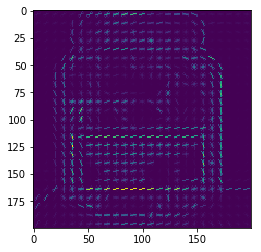

In [20]:
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H, hogImage) = feature.hog(gray_jar[12], orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()

In [567]:
#plt.imshow(train_jar[12])
#plt.show()

In [389]:
#print np.count_nonzero(H!=0)
#H
#print np.count_nonzero(H==0)

# Creating Training Predictor and Response

In [21]:
train_x= np.concatenate((jar_hog_feat, nonjar_hog_feat), axis=0)
train_y=np.concatenate((y_jar, y_nonjar), axis=0)
#np.shape(train_x)
#np.shape(train_y)


# SVM MODEL ON HOG FEATURES

In [22]:
from sklearn.svm import SVC
svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.006, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc.fit(train_x,train_y) 
#score=svc.score(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.006, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [25]:
cross_val_score(svc,train_x,train_y,cv=10)

array([ 0.72      ,  0.84      ,  1.        ,  0.96      ,  0.96      ,
        1.        ,  0.95833333,  0.95833333,  0.70833333,  0.66666667])

# TESTING ON SAMPLE DATA

In [81]:
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.41.47 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.50.41 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.52.08 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.53.36 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.57.33 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 12.16.09 PM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.09.38 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-25 at 11.31.18 AM.png'
test_path='/Users/s0c01xa/Desktop/Test Image .jpg'

test_image = cv2.imread(test_path)
test_image_res=cv2.resize(test_image,(200,200))
test_image_gray=cv2.cvtColor(test_image_res, cv2.COLOR_BGR2GRAY)




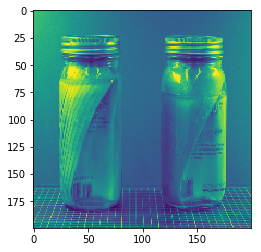

In [82]:
plt.imshow(test_image_gray)
plt.show()

In [83]:
#plt.imshow(image)
#plt.show()
from skimage import feature
H = feature.hog(test_image_gray, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

In [300]:
#plt.imshow(test_image_gray)
#plt.show()

# Plotting the test data

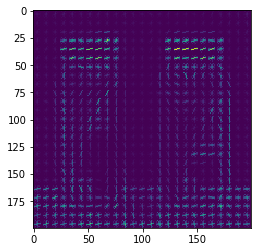

In [84]:
#len(H)
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H_test, hogImage) = feature.hog(test_image_gray, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()


In [397]:
#np.count_nonzero(H_test)

# Predicting based on Linear SVM

In [85]:
np.shape(H_test)
H_test=H_test.reshape(-1,1).T
#pred=svc.predict(H_test)

# pred '1' indicates that it has correctly predicted a jar

In [86]:
svc.predict_proba(H_test)
#pred

array([[ 0.64861768,  0.35138232]])

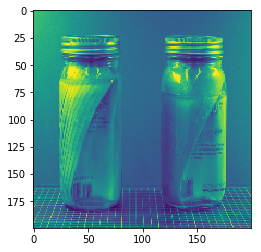

In [87]:
plt.imshow(test_image_gray)
plt.show()

In [ ]:
#Once the prediction is done using a test image, it is time to take the 

In [265]:
#plt.imshow(test_image_gray)
#plt.show()

# HOG SLIDING WINDOW DEFINATION

In [29]:
test_path='/Users/s0c01xa/Desktop/Kitchen.png'

In [ ]:
#Function returning the values

In [ ]:
#The above function gives three things as output. (x,y,image-rectangle)

In [35]:
np.shape(test_image_gray)

(200, 200)

# DEFINING THE WINDOW SIZE

# SLIDING WINDOW IS APPLIED AND FOR EACH WINDOW,SVM IS APPLIED AND THE CORR WINDOW IS SAVED

In [52]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
        for y in range(0, image.shape[0], stepSize):
            for x in range(0, image.shape[1], stepSize):
                # yield the current window
                yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
                #plt.show()

In [53]:
'''#windowSize=[(10,20),(15,10),(20,10),(20,40),(20,30),(30,20),(10,15),(5,10),(10,6),(16,16),(32,32),(48,48),(60,60),(90,90),(120,120),(150,150),(180,180),(200,200),(300,300)]
#step_size=2
#(a,b)=(200,200)
#windowSize=[(37,100),(40,100),(45,110),(38,100)]
c=0
Co_ordinates=[]
for i in windowSize:
    #print i
    for (x, y, window) in tqdm(sliding_window(test_image, 10,i)):
        #print np.shape(window)
        gray_img=cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(gray_img,(200,200))
        from skimage import feature
        H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        #print len(H)
        data=H.reshape(-1,1).T
        #print len(data.T)
        score=svc.predict(data)
        #print score
        #print score
        #print score
        if score==1:
            print score
            cordinates=((x, y,x + i[0],y + i[1]))
            Co_ordinates.append(cordinates)'''


'#windowSize=[(10,20),(15,10),(20,10),(20,40),(20,30),(30,20),(10,15),(5,10),(10,6),(16,16),(32,32),(48,48),(60,60),(90,90),(120,120),(150,150),(180,180),(200,200),(300,300)]\n#step_size=2\n#(a,b)=(200,200)\n#windowSize=[(37,100),(40,100),(45,110),(38,100)]\nc=0\nCo_ordinates=[]\nfor i in windowSize:\n    #print i\n    for (x, y, window) in tqdm(sliding_window(test_image, 10,i)):\n        #print np.shape(window)\n        gray_img=cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)\n        resized_img=cv2.resize(gray_img,(200,200))\n        from skimage import feature\n        H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),\n                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")\n        #print len(H)\n        data=H.reshape(-1,1).T\n        #print len(data.T)\n        score=svc.predict(data)\n        #print score\n        #print score\n        #print score\n        if score==1:\n            print score\n            cordinates=((x, y,x + i[0],y + i[1]))

In [40]:
from tqdm import tqdm


In [88]:
Co_ordinates=[]

for (x, y, window) in tqdm(sliding_window(test_image_gray, 10,(100,200))):
    
    #print np.shape(window)
    resized_img=cv2.resize(window,(200,200))
    from skimage import feature
    H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
    #print len(H)
    data=H.reshape(-1,1).T
    #print len(data.T)
    score=svc.predict(data)
    #print score
    #print score
    #print score
    if score==1:
        print score
        cordinates=((x, y,x + 100,y + 200))
        Co_ordinates.append(cordinates)



12it [00:00, 56.90it/s]

[1]
[1]
[1]
[1]
[1]
[1]


25it [00:00, 59.67it/s]

[1]


44it [00:00, 59.60it/s]

[1]


400it [00:06, 61.69it/s]


In [89]:
Co_ordinates


[(0, 0, 100, 200),
 (10, 0, 110, 200),
 (20, 0, 120, 200),
 (90, 0, 190, 200),
 (100, 0, 200, 200),
 (110, 0, 210, 200),
 (120, 0, 220, 200),
 (110, 10, 210, 210)]

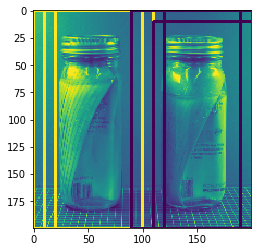

In [97]:
import cv2
clone=test_image_gray
plt.imshow(cv2.rectangle(clone, (120, 0), (220, 200), (0,255,0), 2))
plt.show()


In [688]:
#resized_img=cv2.resize(window,(400,400))
#plt.imshow(resized_img)
#plt.show()

In [350]:
#plt.imshow(test_image_gray)
#plt.show()

In [549]:
#image
#plt.imshow(test_image_gray)
#plt.show()


In [550]:
#sliding_window(image, stepSize, windowSize)

In [442]:
temp = sliding_window(test_image_gray, 50, (500,400))


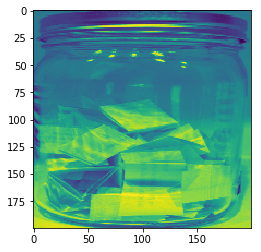

In [443]:
a=temp.next()
plt.imshow(a[2])
plt.show()

In [86]:
a1=cv2.resize(a[2],(200,200))
#plt.imshow(a1)
#plt.show()
H1=feature.hog(a1, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

In [63]:
svc.predict(H1.reshape(-1,1).T)

array([1])

# TEST IMAGE

In [483]:
test_image_resized=cv2.resize(test_image,(1024,1024))

# IMAGE PYRAMID

11


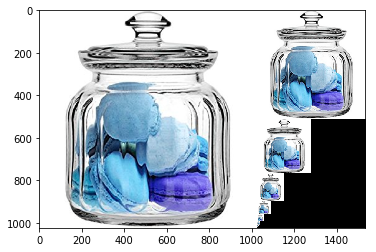

In [487]:
from skimage import data
from skimage.transform import pyramid_gaussian

#image = data.astronaut()
rows, cols, dim = test_image_resized.shape
pyramid = tuple(pyramid_gaussian(test_image_resized, downscale=2))#, multichannel=True))
print len(pyramid)

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()
#len(composite_image)

In [465]:
#np.shape(image)
#np.shape(test_image)

In [467]:
np.shape(pyramid)

(10,)

In [495]:
import skimage
img1=skimage.transform.pyramid_reduce(test_image_resized, downscale=2, sigma=None, order=1, 
                                 mode='reflect', cval=0)

In [497]:
img2=skimage.transform.pyramid_reduce(test_image_resized, downscale=4, sigma=None, order=1, 
                                 mode='reflect', cval=0)